In [50]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [51]:
import json
data = json.load(open('./data.json'))['acts']

## Занятость

In [52]:
drama_heroes = [hero for scene in [scene for act in data for scene in act] for hero in scene]
busyness = pd.DataFrame(Counter(drama_heroes), index=['занятость'])
busyness

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
занятость,22,17,3,26,5,2,32,3,22,4,26,16,15,4,4,4,18


## Матрица

In [53]:
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [54]:
def col(na, ns): return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[na] + '.' + str(ns)
columns = [[col(na+1, ns+1) for ns in range(len(matrices[na][0]))] for na in range(len(matrices))]
columns = [col for item in columns for col in item]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=columns)

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,I.10,I.11,I.12,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,IV.9,IV.10,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12
анфуса,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
беркутов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0
влас,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
глафира,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0
горецкий,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
корнилий,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
купавина,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0
лакей,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
лыняев,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0
маляр,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Мобильность

In [55]:
mobility = (np.sum(np.abs(matrix[:, 1:] - matrix[:, :-1]), axis=1) - 1) / (len(matrix[0])-1)

In [56]:
pd.DataFrame({h: m for h, m in zip(drama_heroes, mobility)}, index=['мобильность']).round(3)

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
мобильность,0.25,0.058,0.019,0.288,0.096,0.019,0.135,0.096,0.212,0.0,0.115,0.154,0.154,0.0,0.0,0.0,0.173


## Плотность

In [57]:
def density(matrix):
    return np.count_nonzero(matrix)/matrix.size

### Пьесы

In [58]:
round(density(matrix), 3)

0.248

### Действий

In [59]:
act_density = [density(m) for m in matrices]
pd.DataFrame({i: d for i, d in enumerate(act_density, start=1)}, index=['плотность']).round(3)

,1,2,3,4,5
плотность,0.304,0.218,0.229,0.229,0.245


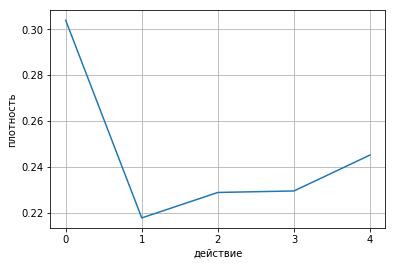

In [60]:
plt.plot(act_density)
plt.xticks(range(len(act_density)), range(len(act_density)))
plt.xlabel('действие')
plt.ylabel('плотность')
plt.grid()

### Явлений

In [61]:
scene_density = [[density(m[:, i]) for i in range(len(m[0]))] for m in matrices]

df = pd.DataFrame(scene_density, index=range(1, len(matrices)+1))
df.columns = df.columns + 1
df.index.name = 'действие'
df.round(3)

,1,2,3,4,5,6,7,8,9,10,11,12
действие,,,,,,,,,,,,
1,0.353,0.412,0.471,0.471,0.235,0.294,0.176,0.176,0.294,0.294,0.294,0.176
2,0.176,0.353,0.294,0.235,0.176,0.294,0.294,0.118,0.118,0.118,NaN,NaN
3,0.353,0.235,0.235,0.235,0.176,0.294,0.176,0.176,0.176,NaN,NaN,NaN
4,0.235,0.294,0.235,0.176,0.235,0.176,0.176,0.235,0.235,0.294,NaN,NaN
5,0.176,0.176,0.176,0.235,0.176,0.294,0.235,0.176,0.235,0.412,0.471,0.176


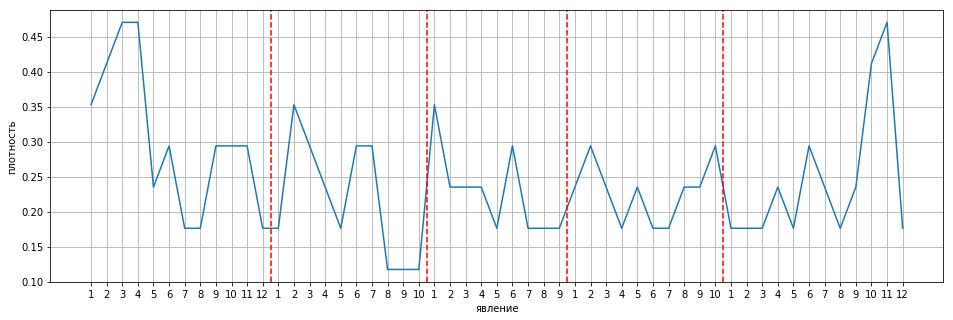

In [62]:
from itertools import accumulate
plt.subplots(figsize=(16, 5))
plt.plot([d for a in scene_density for d in a])
plt.xticks(range(len(columns)), [i for a in scene_density for i in range(1, len(a)+1)])
for x in accumulate([len(a) for a in scene_density][:-1]):
    plt.axvline(x-0.5, c='r', ls='--')
plt.xlabel('явление')
plt.ylabel('плотность')
plt.grid()

## Расстояние

In [63]:
distances = np.zeros((len(drama_heroes), len(drama_heroes)))
for i in range(len(matrix)-1):
    for j in range(i+1, len(matrix)):
        distances[i][j] = distances[j][i] = np.sum(np.abs(matrix[i] - matrix[j]))
distances /= len(matrix[0])

In [64]:
pd.DataFrame(distances, index=drama_heroes, columns=drama_heroes).round(3)

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,0.000,0.547,0.472,0.377,0.434,0.453,0.377,0.434,0.302,0.491,0.491,0.415,0.547,0.491,0.491,0.491,0.604
беркутов,0.547,0.000,0.377,0.585,0.340,0.358,0.358,0.302,0.396,0.396,0.509,0.623,0.491,0.396,0.396,0.396,0.434
влас,0.472,0.377,0.000,0.472,0.151,0.094,0.660,0.113,0.472,0.094,0.509,0.245,0.226,0.094,0.094,0.094,0.358
глафира,0.377,0.585,0.472,0.000,0.472,0.491,0.415,0.472,0.377,0.528,0.604,0.528,0.547,0.528,0.528,0.528,0.679
горецкий,0.434,0.340,0.151,0.472,0.000,0.132,0.585,0.113,0.396,0.170,0.585,0.358,0.377,0.170,0.170,0.170,0.396
корнилий,0.453,0.358,0.094,0.491,0.132,0.000,0.642,0.094,0.453,0.038,0.491,0.340,0.283,0.038,0.038,0.038,0.302
купавина,0.377,0.358,0.660,0.415,0.585,0.642,0.000,0.547,0.415,0.679,0.566,0.642,0.736,0.679,0.679,0.679,0.717
лакей,0.434,0.302,0.113,0.472,0.113,0.094,0.547,0.000,0.434,0.132,0.547,0.358,0.340,0.132,0.132,0.132,0.396
лыняев,0.302,0.396,0.472,0.377,0.396,0.453,0.415,0.434,0.000,0.491,0.717,0.566,0.547,0.491,0.491,0.491,0.566
маляр,0.491,0.396,0.094,0.528,0.170,0.038,0.679,0.132,0.491,0.000,0.528,0.340,0.245,0.000,0.000,0.000,0.264


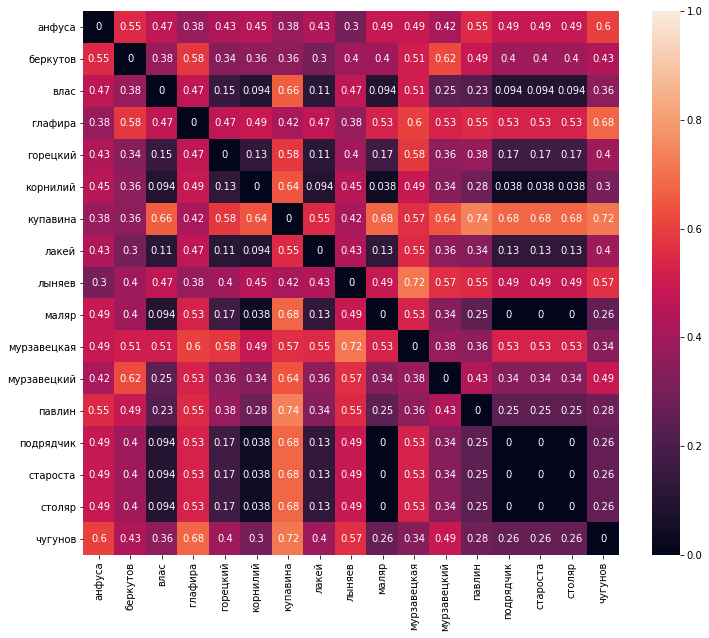

In [65]:
import seaborn as sns
plt.subplots(figsize=(12, 10))
sns.heatmap(distances, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [66]:
for i, j in zip(*np.where(distances == 0)):
    if i != j and i > j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

подрядчик = маляр
староста = маляр
староста = подрядчик
столяр = маляр
столяр = подрядчик
столяр = староста


## Ранг

In [67]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]

In [68]:
df = pd.DataFrame({h: r for h, r in zip(drama_heroes, rank)}, index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)
df

,купавина,глафира,мурзавецкая,анфуса,лыняев,чугунов,павлин,беркутов,мурзавецкий,маляр,подрядчик,староста,столяр,горецкий,влас,корнилий,лакей
ранг,103,91,89,80,75,71,61,56,53,25,25,25,25,16,14,13,10


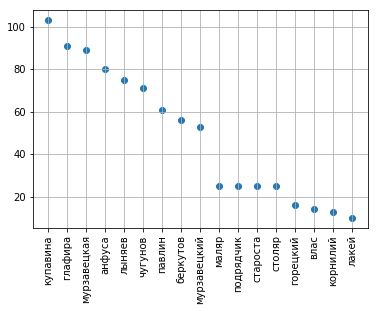

In [69]:
plt.scatter(range(len(drama_heroes)), df.values)
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90)
plt.grid()

## Относительные частоты

In [70]:
freq = busyness/len(matrix[0])
freq.index = ['частоты']
busyness = busyness.values[0]
freq.round(3)

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
частоты,0.415,0.321,0.057,0.491,0.094,0.038,0.604,0.057,0.415,0.075,0.491,0.302,0.283,0.075,0.075,0.075,0.34


## Условные относительные частоты

In [71]:
freq = np.zeros((len(drama_heroes), len(drama_heroes)))
for i in range(len(matrix)):
    for j in range(len(matrix)):
        freq[i, j] = np.count_nonzero(matrix[i] + matrix[j] - 2 == 0)/busyness[j]

In [73]:
pd.DataFrame(freq, index=drama_heroes, columns=drama_heroes).round(3)

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.000,0.294,0.000,0.538,0.4,0.0,0.531,0.333,0.636,0.00,0.423,0.500,0.267,0.00,0.00,0.00,0.222
беркутов,0.227,1.000,0.000,0.231,0.4,0.0,0.469,0.667,0.409,0.00,0.308,0.000,0.200,0.00,0.00,0.00,0.333
влас,0.000,0.000,1.000,0.077,0.0,0.0,0.000,0.000,0.000,0.25,0.038,0.188,0.200,0.25,0.25,0.25,0.056
глафира,0.636,0.353,0.667,1.000,0.6,0.5,0.562,0.667,0.636,0.25,0.385,0.438,0.400,0.25,0.25,0.25,0.222
горецкий,0.091,0.118,0.000,0.115,1.0,0.0,0.094,0.333,0.136,0.00,0.000,0.062,0.000,0.00,0.00,0.00,0.056
корнилий,0.000,0.000,0.000,0.038,0.0,1.0,0.000,0.000,0.000,0.50,0.038,0.000,0.067,0.50,0.50,0.50,0.111
купавина,0.773,0.882,0.000,0.692,0.6,0.0,1.000,1.000,0.727,0.00,0.538,0.438,0.267,0.00,0.00,0.00,0.333
лакей,0.045,0.118,0.000,0.077,0.2,0.0,0.094,1.000,0.045,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.000
лыняев,0.636,0.529,0.000,0.538,0.6,0.0,0.500,0.333,1.000,0.00,0.192,0.250,0.267,0.00,0.00,0.00,0.278
маляр,0.000,0.000,0.333,0.038,0.0,1.0,0.000,0.000,0.000,1.00,0.038,0.062,0.200,1.00,1.00,1.00,0.222


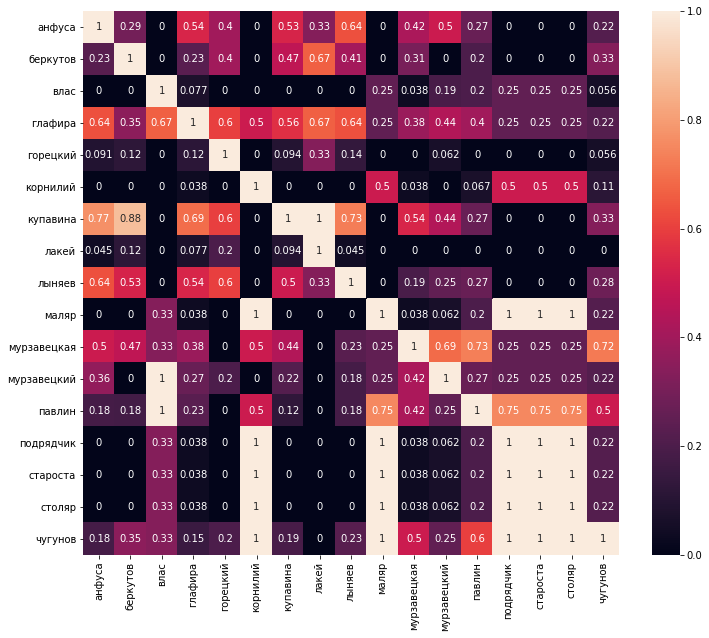

In [74]:
plt.subplots(figsize=(12, 10))
sns.heatmap(freq, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)